In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
after_wellness = pd.read_excel("data/코로나이후_웰니스관광.xlsx")

In [3]:
after_wellness.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/tongyeongsi?Redirect=Lo...,2020.08.10.,해상택시 타고 떠나는 통영의 웰니스관광 비경과 추억을...,"['#한국관광공사', '#문화체육관광부', '#통영시', '#통영가볼만한곳', '#...",['\n\n\n\n비가 오락가락하는 장마철이지만 통영의 웰니스관광에 참여하였습니다....
1,https://blog.naver.com/travelhc?Redirect=Log&l...,2020.07.01.,합천 웰니스 관광 오도산 자연휴양림 치유의 숲,"['#합천', '#웰니스관광', '#오도산자연휴양림', '#오도산치유의숲', '#오...",['\n\n\n\n더워지는 여름 여행 계획 세우셨나요? 여행 계획을 세우실 때 어떤...
2,https://blog.naver.com/k-fowi?Redirect=Log&log...,2020.04.07.,"국립산림치유원, '18~19 웰니스 관광지 이용자 만족도 '전국...","['#국립산림치유원', '#웰니스관광지', '#다스림', '#건강증진센터', '#산...","['\n\n\n\n출처ㅣ산림복지 블로그기자단 3기 박경숙 기자\n\n\n\n', '..."
3,https://blog.naver.com/ksg2028?Redirect=Log&lo...,2020.07.01.,치유와 휴식이 있는 추천 웰니스 관광지 할인 캠페인,[],['\n\n\n\n문화체육관광부(장관 박양우)와 한국관광공사(사장 안영배)는 K방역...
4,https://blog.naver.com/kasdy?Redirect=Log&logN...,2020.06.11.,'웰니스 관광지 9곳' 여행하며 지친 심신을 위로받으세요~,"['#웰니스관광지', '#코로나19', '#관광지', '#여행']",['\n\n\n\n여러분들 건강하신가요? 코로나 19로 다들 몸과 마음이 지쳐있을텐...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
after_wellness = after_wellness.drop([987, 997])

In [5]:
after_wellness["hashtags"] = after_wellness["hashtags"].apply(ast.literal_eval)
after_wellness["contents"] = after_wellness["contents"].apply(ast.literal_eval)

In [6]:
after_wellness = after_wellness[(after_wellness["hashtags"].str.len() != 0) | (after_wellness["contents"].str.len() != 0)]

In [7]:
len(after_wellness)

1868

- hashtags랑 contents 데이터 합치기

In [8]:
after_wellness["info"] = after_wellness["hashtags"] + after_wellness["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [9]:
after_wellness["info"] = after_wellness["info"].map(lambda x: ' '.join(x))

In [10]:
after_wellness["info"] = after_wellness["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [11]:
okt = Okt()
after_wellness["info"] = after_wellness["info"].map(lambda x: okt.nouns(x))

In [12]:
after_wellness["info"]

0       [한국, 관광, 공사, 문화, 체육관, 광부, 통영시, 통영, 곳, 통영, 해상, ...
1       [합천, 웰니스관광, 오도산, 자연휴양림, 오도산, 치유, 숲, 오도산, 치유, 숲...
2       [국립, 산림, 치유, 웰니스관광, 건강, 증진, 센터, 산림, 치유, 테라, 피시...
3       [문화, 체육관, 광부, 장관, 박양우, 한국, 관광, 공사, 사장, 안영배, 방역...
4       [웰니스관광, 코로나, 관광지, 여행, 여러분, 코로나, 로, 몸, 마음, 문화, ...
                              ...                        
1995    [인천, 웰, 니스, 인천, 웰니스관광, 웰니스관광, 인천, 관광, 공사, 뷰티, ...
1996    [마이스, 마이스, 경남, 관광, 재단, 경상남도, 관광, 재단, 경남, 웰니스관광...
1997    [정선, 파크, 쉬, 정선, 파크, 쉬, 강원도, 숙소, 정선, 웰니스관광, 정선,...
1998    [정선, 곳, 정선, 로미, 지안, 가든, 로미, 지안, 가든, 정선, 여행, 국내...
1999    [경남, 경남, 관광, 재단, 경상남도, 관광, 재단, 창업, 아이디어, 경진, 대...
Name: info, Length: 1868, dtype: object

# WordCloud

In [13]:
word_tokens = list(after_wellness["info"])
word_tokens = sum(word_tokens, [])

In [14]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [15]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

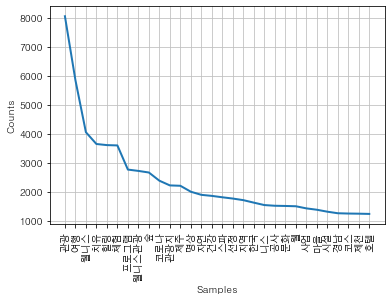

In [16]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

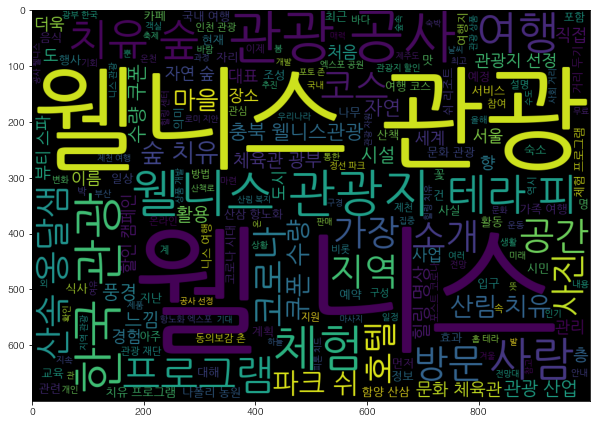

In [17]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('웰니스관광_코로나후.png')

# Word2vec

In [18]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = after_wellness["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [19]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [20]:
print("웰니스관광와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "힐링여행")))

웰니스관광와 힐링여행의 단어간 유사도는 0.75 입니다.


In [21]:
print("웰니스관광와 힐링의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "힐링")))

웰니스관광와 힐링의 단어간 유사도는 0.49 입니다.


In [22]:
print("웰니스관광와 자연의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "자연")))

웰니스관광와 자연의 단어간 유사도는 0.29 입니다.
